In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [13]:
# Load in the data
cifar100 = tf.keras.datasets.cifar100

# Distribute it to train and test set
(x_train, y_train), (x_val, y_val) = cifar100.load_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


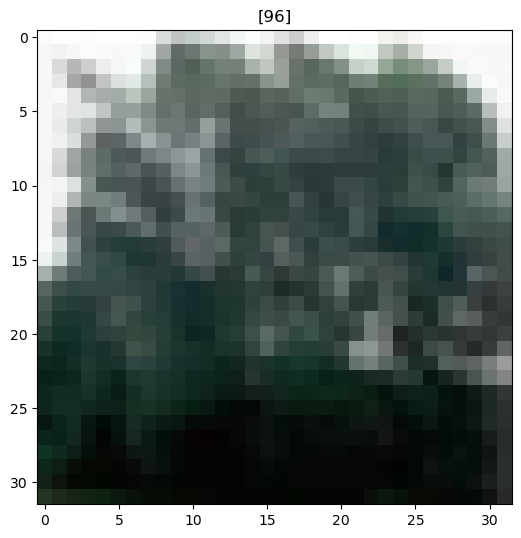

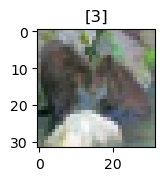

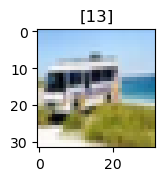

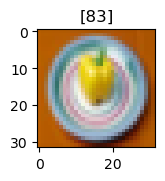

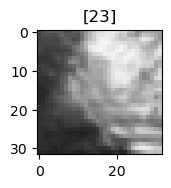

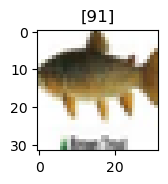

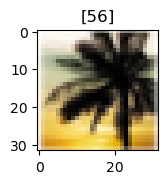

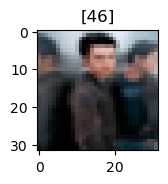

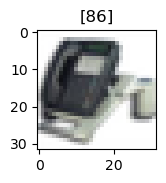

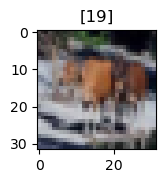

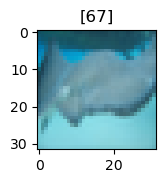

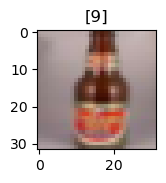

In [14]:
def show_samples(data, labels):
    plt.subplots(figsize=(20, 20))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        k = np.random.randint(0, data.shape[0])
        plt.title(labels[k])
        plt.imshow(data[k])
        plt.tight_layout()
        plt.show()


show_samples(x_train, y_train)

In [15]:
y_train = tf.one_hot(
    y_train,
    depth=y_train.max() + 1,
    dtype=tf.float64
)

y_val = tf.one_hot(
    y_val,
    depth=y_val.max() + 1,
    dtype=tf.float64
)

y_train = tf.squeeze(y_train)
y_val = tf.squeeze(y_val)

In [16]:
model = tf.keras.models.Sequential([
    layers.Conv2D(
        16, (3, 3), activation='relu',
        input_shape=(32, 32, 3), padding='same'
    ),
    layers.Conv2D(
        32, (3, 3),
        activation='relu',
        padding='same'
    ),
    layers.Conv2D(
        64, (3, 3),
        activation='relu',
        padding='same'
    ),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(
        128, (3, 3),
        activation='relu',
        padding='same'
    ),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(100, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['AUC', 'accuracy']
)


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                        

In [18]:
hist = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    verbose=1,
    validation_data=(x_val, y_val)
)

Epoch 1/10
782/782 [==============================] - 221s 278ms/step - loss: 3.8892 - auc: 0.7873 - accuracy: 0.1161 - val_loss: 5.0753 - val_auc: 0.6711 - val_accuracy: 0.0769
Epoch 2/10
782/782 [==============================] - 227s 291ms/step - loss: 3.3505 - auc: 0.8618 - accuracy: 0.1938 - val_loss: 3.4138 - val_auc: 0.8595 - val_accuracy: 0.1703
Epoch 3/10
782/782 [==============================] - 228s 291ms/step - loss: 2.8575 - auc: 0.9052 - accuracy: 0.2864 - val_loss: 2.8619 - val_auc: 0.8984 - val_accuracy: 0.2938
Epoch 4/10
782/782 [==============================] - 225s 288ms/step - loss: 2.4588 - auc: 0.9310 - accuracy: 0.3651 - val_loss: 2.4037 - val_auc: 0.9313 - val_accuracy: 0.3792
Epoch 5/10
782/782 [==============================] - 226s 289ms/step - loss: 2.1452 - auc: 0.9476 - accuracy: 0.4296 - val_loss: 2.3834 - val_auc: 0.9331 - val_accuracy: 0.4031
Epoch 6/10
782/782 [==============================] - 225s 288ms/step - loss: 1.8329 - auc: 0.9611 - accuracy:

In [19]:
temp = model.get_layer('conv2d_3')
last_output = temp.output
last_output.shape

TensorShape([None, 16, 16, 128])

In [20]:
x = layers.Flatten()(last_output)

x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)

output = layers.Dense(10, activation='softmax')(x)

model_new = keras.Model(model.input, output)

In [21]:
model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                             

In [22]:
model_new.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['AUC', 'accuracy']
)

In [23]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_val, y_val) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [24]:
y_train = tf.one_hot(
    y_train, depth=10,
    dtype=tf.float64
)
y_val = tf.one_hot(
    y_val, depth=10,
    dtype=tf.float64
)

y_train = tf.squeeze(y_train)
y_val = tf.squeeze(y_val)

In [41]:
history.history['accuracy']

[0.9251999855041504,
 0.9533399939537048,
 0.9632999897003174,
 0.9690399765968323,
 0.9738600254058838,
 0.9755799770355225,
 0.9778800010681152]

KeyError: 'validation_loss'

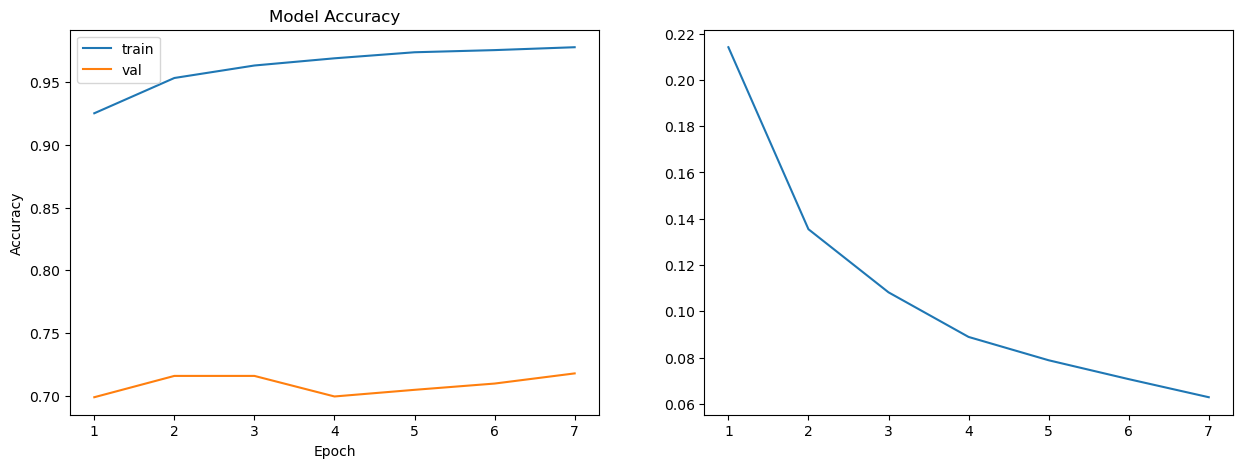

In [42]:
#1. Function to plot model's validation loss and validation accuracy
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    # axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['validation_loss'])+1),model_history.history['validation_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    # axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

plot_model_history(history)

In [36]:
loss, accuracy, validation = model_new.evaluate(x_val, y_val, verbose=1)
print("Accuracy = %f  ;  Loss = %f ; Validation = %f" % (accuracy, loss, validation))
model_new.save("model.h5")

313/313 [==============================] - 10s 32ms/step - loss: 1.4272 - auc: 0.9262 - accuracy: 0.7177
Accuracy = 0.926235  ;  Loss = 1.427201 ; Validation = 0.717700
